In [240]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [241]:
data = pd.read_csv('talking_data.csv')

In [242]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip               100000 non-null  int64 
 1   app              100000 non-null  int64 
 2   device           100000 non-null  int64 
 3   os               100000 non-null  int64 
 4   channel          100000 non-null  int64 
 5   click_time       100000 non-null  object
 6   attributed_time  227 non-null     object
 7   is_attributed    100000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [243]:
data.shape

(100000, 8)

In [244]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ip,100000.0,91255.87967,69835.553661,9.0,40552.0,79827.0,118252.0,364757.0
app,100000.0,12.04788,14.941500,1.0,3.0,12.0,15.0,551.0
device,100000.0,21.77125,259.667767,0.0,1.0,1.0,1.0,3867.0
os,100000.0,22.81828,55.943136,0.0,13.0,18.0,19.0,866.0
channel,100000.0,268.83246,129.724248,3.0,145.0,258.0,379.0,498.0
is_attributed,100000.0,0.00227,0.047591,0.0,0.0,0.0,0.0,1.0


In [245]:
data.isna().sum()

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

By using Pandas derive new features such as - 'day_of_week' , 'day_of_year' , 'month' , and 'hour' as float/int datatypes using the 'click_time' column . Add the newly derived columns in original dataset.


In [246]:
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


find maximum unique val -click_time,ip has maximum unique values

Add day,month,year to dataframe for 'click_time'

In [247]:
data['click_time']= pd.to_datetime(data['click_time'])
data['day_of_week'] = data['click_time'].dt.dayofweek
data['day_of_year'] = data['click_time'].dt.dayofyear
data['month'] = data['click_time'].dt.month 
data['hour'] = data['click_time'].dt.hour


In [248]:
data[data.duplicated()]

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day_of_week,day_of_year,month,hour
84125,871,12,1,13,178,2017-11-08 10:00:05,NaN,0,2,312,11,10


In [249]:
for col in data.columns:
    print(col,data[col].nunique())

ip 34857
app 161
device 100
os 130
channel 161
click_time 80350
attributed_time 227
is_attributed 2
day_of_week 4
day_of_year 4
month 1
hour 24


In [250]:
data.describe()

,ip,app,device,os,channel,click_time,is_attributed,day_of_week,day_of_year,month,hour
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,2017-11-08 06:29:52.171910144,0.002270,1.861460,311.861460,11.0,9.328590
min,9.000000,1.00000,0.000000,0.000000,3.000000,2017-11-06 16:00:00,0.000000,0.000000,310.000000,11.0,0.000000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,2017-11-07 11:34:09.500000,0.000000,1.000000,311.000000,11.0,4.000000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,2017-11-08 07:07:50,0.000000,2.000000,312.000000,11.0,9.000000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,2017-11-09 02:06:01.249999872,0.000000,3.000000,313.000000,11.0,14.000000
max,364757.000000,551.00000,3867.000000,866.000000,498.000000,2017-11-09 15:59:51,1.000000,3.000000,313.000000,11.0,23.000000
std,69835.553661,14.94150,259.667767,55.943136,129.724248,NaN,0.047591,0.889266,0.889266,0.0,6.180586


In [251]:
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day_of_week,day_of_year,month,hour
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0,1,311,11,9
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0,1,311,11,13
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0,1,311,11,18
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0,1,311,11,4
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0,3,313,11,9


Use default datetime of 1/1/1900 to fill null values in attributed_time

In [252]:

#data['attributed_time'] = data['attributed_time'].fillna(pd.to_datetime('19000101'))
data['click_time'] = data['click_time'].fillna(pd.to_datetime('19000101'))

In [253]:
data.describe()

,ip,app,device,os,channel,click_time,is_attributed,day_of_week,day_of_year,month,hour
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,2017-11-08 06:29:52.171910144,0.002270,1.861460,311.861460,11.0,9.328590
min,9.000000,1.00000,0.000000,0.000000,3.000000,2017-11-06 16:00:00,0.000000,0.000000,310.000000,11.0,0.000000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,2017-11-07 11:34:09.500000,0.000000,1.000000,311.000000,11.0,4.000000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,2017-11-08 07:07:50,0.000000,2.000000,312.000000,11.0,9.000000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,2017-11-09 02:06:01.249999872,0.000000,3.000000,313.000000,11.0,14.000000
max,364757.000000,551.00000,3867.000000,866.000000,498.000000,2017-11-09 15:59:51,1.000000,3.000000,313.000000,11.0,23.000000
std,69835.553661,14.94150,259.667767,55.943136,129.724248,NaN,0.047591,0.889266,0.889266,0.0,6.180586


3.Use an appropriate technique to get rid of all the apps that are very rare (say which comprise of less than 20% clicks) and plot the rest..


In [254]:
data['click_time'].count()* (20/100)
data.drop((data.groupby(data['app']).count()<20000).index)
#data['app'].groupby(data['app']).sum(0)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day_of_week,day_of_year,month,hour
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0,1,311,11,9
40,133933,12,1,13,140,2017-11-07 11:11:53,NaN,0,1,311,11,11
41,35096,18,1,19,107,2017-11-09 15:26:37,NaN,0,3,313,11,15
51,123221,15,1,20,245,2017-11-07 15:31:06,NaN,0,1,311,11,15
57,104645,14,1,19,379,2017-11-09 12:57:00,NaN,0,3,313,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,2017-11-09 13:25:41,NaN,0,3,313,11,13
99996,85150,9,1,13,244,2017-11-07 11:25:43,NaN,0,1,311,11,11
99997,18839,3,1,13,19,2017-11-08 11:38:42,NaN,0,2,312,11,11
99998,114276,15,1,12,245,2017-11-08 17:55:21,NaN,0,2,312,11,17


In [255]:
data.describe()

,ip,app,device,os,channel,click_time,is_attributed,day_of_week,day_of_year,month,hour
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,2017-11-08 06:29:52.171910144,0.002270,1.861460,311.861460,11.0,9.328590
min,9.000000,1.00000,0.000000,0.000000,3.000000,2017-11-06 16:00:00,0.000000,0.000000,310.000000,11.0,0.000000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,2017-11-07 11:34:09.500000,0.000000,1.000000,311.000000,11.0,4.000000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,2017-11-08 07:07:50,0.000000,2.000000,312.000000,11.0,9.000000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,2017-11-09 02:06:01.249999872,0.000000,3.000000,313.000000,11.0,14.000000
max,364757.000000,551.00000,3867.000000,866.000000,498.000000,2017-11-09 15:59:51,1.000000,3.000000,313.000000,11.0,23.000000
std,69835.553661,14.94150,259.667767,55.943136,129.724248,NaN,0.047591,0.889266,0.889266,0.0,6.180586


In [256]:
data_2 = data.drop(['click_time','attributed_time','month','os'],axis=1)
#plt.figure(figsize=(10,15))
#plt.heatmap(corr,annot=True,cmap='coolwarm')
data_2

,ip,app,device,channel,is_attributed,day_of_week,day_of_year,hour
0,87540,12,1,497,0,1,311,9
1,105560,25,1,259,0,1,311,13
2,101424,12,1,212,0,1,311,18
3,94584,13,1,477,0,1,311,4
4,68413,12,1,178,0,3,313,9
...,...,...,...,...,...,...,...,...
99995,124883,11,1,122,0,3,313,13
99996,85150,9,1,244,0,1,311,11
99997,18839,3,1,19,0,2,312,11
99998,114276,15,1,245,0,2,312,17


<Axes: >

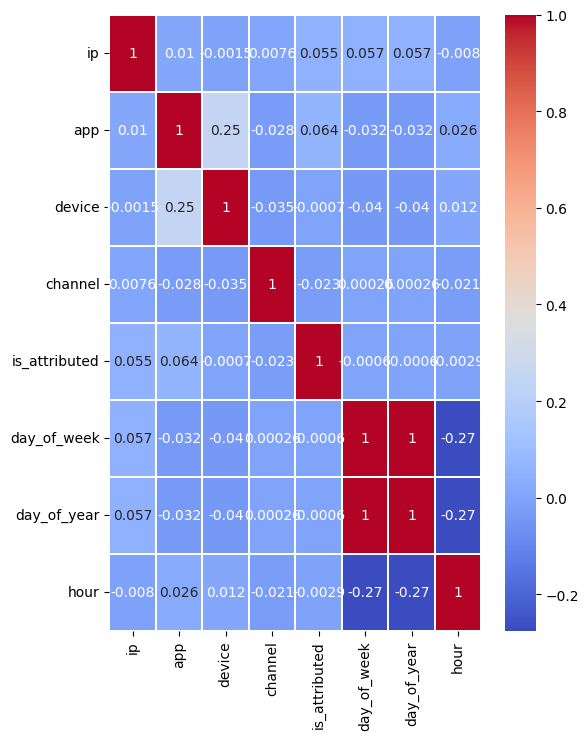

In [257]:
import seaborn as sns
data_corr = data_2.corr()
plt.figure(figsize=(6,8))
sns.heatmap(data_corr,annot=True,cmap='coolwarm',linecolor='white',linewidths='0.1')


In [258]:
data_2.info()
#plt.plot(data_2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   ip             100000 non-null  int64
 1   app            100000 non-null  int64
 2   device         100000 non-null  int64
 3   channel        100000 non-null  int64
 4   is_attributed  100000 non-null  int64
 5   day_of_week    100000 non-null  int32
 6   day_of_year    100000 non-null  int32
 7   hour           100000 non-null  int32
dtypes: int32(3), int64(5)
memory usage: 5.0 MB


pairplot  for clicks(is_attributed) vs downloads(attributed_time)

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


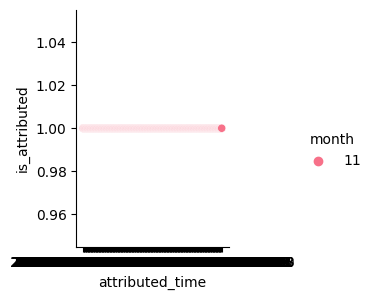

In [259]:

sns.pairplot(data,x_vars=data.columns[6],y_vars=data.columns[7],dropna=True,hue=data.columns[10],height=3.0,palette='husl')



In [260]:
X=data.drop(columns=['attributed_time','click_time','is_attributed','day_of_week','day_of_year','hour'],axis=1)
y=data['is_attributed']

In [261]:
y.shape

(100000,)

Divide the data into training and testing subsets into 80:20 ratio(Train_data = 80% , Testing_data = 20%) and check the average download rates('is_attributed') for train and test data, scores should be comparable.


In [262]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
(X_train,X_test,y_train,y_test) = train_test_split(X,y,test_size=0.2,random_state=1) 

5.The avearage download rate for train and test data is cpmparable.

In [263]:
print("Average download data for train",y_train.mean())

Average download data for train 0.002275


In [264]:
print("Average download data for test",y_test.mean())

Average download data for test 0.00225


SCALAR TRANSFORMATION

In [265]:
scx=StandardScaler()
X_train = scx.fit_transform(X_train)
X_test= scx.transform(X_test)

In [266]:
from sklearn.linear_model import LogisticRegression
model1_classifier = LogisticRegression()
model1_classifier.fit(X_train,y_train)
y_pred = model1_classifier.predict(X_test)


In [267]:
from sklearn.metrics import classification_report,confusion_matrix
print("Confusion matrix",confusion_matrix(y_test,y_pred,labels=[0,1]))

Confusion matrix [[19955     0]
 [   45     0]]


In [268]:
print("accuracy score",classification_report(y_test,y_pred,labels=[0,1]))

accuracy score               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19955
           1       0.00      0.00      0.00        45

    accuracy                           1.00     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       1.00      1.00      1.00     20000



c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

AREA UNDER CURVE

## AUC-ROC Curve:
AUC(area under the curve) Is an evaluation meric that is used to analyze the classification model at different threshold value.

In [269]:
from sklearn.metrics import roc_auc_score
auc = np.round(roc_auc_score(y_test,y_pred),3)
print("Auc", (auc))

Auc 0.5


BAGGING CLASSFIER - RANDOM FOREST
Set parameters 

In [270]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.model_selection import GridSearchCV
params= {
    'n_estimators':[50,25,75],
    'criterion' : ['gini','entropy'],
    'max_depth':[3],'min_samples_split':[2]    
    }
model = RandomForestClassifier(random_state=42)


In [271]:
grid = GridSearchCV(estimator=model,param_grid=params,cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}


In [272]:
#best filt parameters from above
from sklearn.metrics import accuracy_score
model1 = RandomForestClassifier(criterion= 'gini', max_depth= 3, min_samples_split= 2, n_estimators= 50)
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
#y_pred

In [273]:
print("Random Forest classifier accuracy score",accuracy_score(y_test,y_pred))
print("Random Forest Confusion Matrix",confusion_matrix(y_test,y_pred))

Random Forest classifier accuracy score 0.99775
Random Forest Confusion Matrix [[19955     0]
 [   45     0]]


ADABOOST CLASSIFIER

In [274]:
from sklearn.metrics import roc_auc_score
auc = np.round(roc_auc_score(y_test,y_pred),3)
print("Auc", (auc))

Auc 0.5


In [276]:
bagg = BaggingClassifier(n_estimators=10,max_samples=.7,bootstrap=True)
model2=bagg.fit(X_train,y_train)
pred=model2.predict(X_test)

In [280]:
print("Bagging accuracy score",accuracy_score(pred,y_test))
print("confusion matrix",confusion_matrix(pred,y_test))
auc = np.round(roc_auc_score(y_test,pred),3)
print("Auc", (auc))


Bagging accuracy score 0.99755
confusion matrix [[19942    36]
 [   13     9]]
Auc 0.6


In [282]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
adboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                             n_estimators=300,
                             learning_rate=1.5)
model3=adboost.fit(X_train,y_train)
pred=model3.predict(X_test)


In [283]:
print("Accuracy score fpr ADABoost",accuracy_score(y_test,pred))

Accuracy score fpr ADABoost 0.9976


In [ ]:
print("Confusion matrix for ADABoost",confusion_matrix(y_test,pred))

Confusion matrix for ADABoost [[19943    12]
 [   36     9]]


7. On evaluating the predictions made by the model what is the AUC/ROC score with default hyperparameters.


In [284]:
from sklearn.metrics import roc_auc_score
auc = np.round(roc_auc_score(y_test,pred),3)
print("Auc", (auc))

Auc 0.6


data.info()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ip               100000 non-null  int64         
 1   app              100000 non-null  int64         
 2   device           100000 non-null  int64         
 3   os               100000 non-null  int64         
 4   channel          100000 non-null  int64         
 5   click_time       100000 non-null  datetime64[ns]
 6   attributed_time  227 non-null     object        
 7   is_attributed    100000 non-null  int64         
 8   day_of_week      100000 non-null  int32         
 9   day_of_year      100000 non-null  int32         
 10  month            100000 non-null  int32         
 11  hour             100000 non-null  int32         
dtypes: datetime64[ns](1), int32(4), int64(6), object(1)
memory usage: 7.6+ MB


In [ ]:
data1 = data.copy()

In [ ]:
data1.drop(columns=['day_of_week','day_of_year','month','hour'],axis=1, inplace=True)

In [ ]:
data1

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0
...,...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,2017-11-09 13:25:41,NaN,0
99996,85150,9,1,13,244,2017-11-07 11:25:43,NaN,0
99997,18839,3,1,13,19,2017-11-08 11:38:42,NaN,0
99998,114276,15,1,12,245,2017-11-08 17:55:21,NaN,0


In [ ]:
max(len(data['ip'].unique()),len(data['is_attributed'].unique()),len(data['attributed_time'].unique()),len(data['click_time'].unique()),len(data['channel'].unique()),len(data['os'].unique()),len(data['device'].unique()),len(data['app'].unique()))

80350

In [ ]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(estimator=LogisticRegression(),max_samples=100,bootstrap=True,random_state=42)
bgcl.fit(X_train,y_train)
bg_pred=bgcl.predict(X_test)


In [ ]:
 #bg_pred=bgcl.predict(y_test,y_pred)
accuracy_score(bg_pred,y_test)


0.99775

In [ ]:
from sklearn.metrics import roc_auc_score
auc = np.round(roc_auc_score(y_test,bg_pred),3)
print("Auc", (auc))

Auc 0.5


In [ ]:
import xgboost as xgb

In [ ]:
model_xgb = xgb.XGBClassifier(max_depth = 5, n_estimators = 100, learning_rate = 0.3, random_state = 42)


In [ ]:
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
accuracy_score(y_test,model_xgb.predict(X_test))

0.99795

In [ ]:
100-99.795

0.2049999999999983

In [ ]:
from sklearn.metrics import roc_auc_score
auc = np.round(roc_auc_score(y_test,model_xgb.predict(X_test)),3)
print("Auc", (auc))

Auc 0.644


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

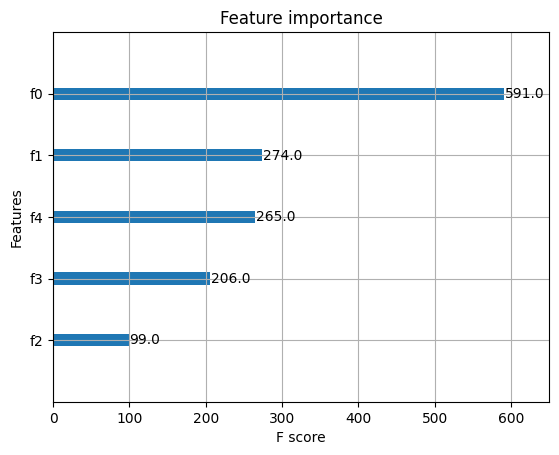

In [ ]:
xgb.plot_importance(model_xgb)

In [ ]:
# apply all thsi bagging and boosting techniques oin seoul bike dataset
# XGBRegressor, AdaBoostRegressor.